Use provided "openpowerlifting-2023-08-12-9f1b3427.csv" dataset. Make statistical inferences about next hypotheses:

- "men lift more than women" compare "TotalKg" lifts

- "men lift more in bench press than women"

- "men lift more than women when bodyweight is 50-55kg"

- "men lift more than women when bodyweight is 100-105kg"

- "men lift more in IPF than in WPC" compare "TotalKg" lifts

- "Lifter country affect to TotalKg"

For all tasks above, use data filtered so that "Event" is "SBD", "Equipment" is "Raw" and "Federation" is "IPF". Use suitable statistical test(s) for inferences. 

Visualize the results. Plot sample data distributions. Use Plotly or Streamlit to create visualization where you can switch between tasks data and results.



In [4]:
import pandas as pd
import requests
import zipfile
import io

url = 'https://openpowerlifting.gitlab.io/opl-csv/files/openpowerlifting-latest.zip'
response = requests.get(url)

# Step 2: Use BytesIO to treat the response content as a file-like object
zip_file = io.BytesIO(response.content)

# Step 3: Open the ZIP file in memory using zipfile.ZipFile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Find the CSV file in the ZIP archive
    csv_filename = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]
    
    # Step 4: Read the CSV file directly from the ZIP archive without extracting it
    with zip_ref.open(csv_filename) as csv_file:
        df = pd.read_csv(csv_file, parse_dates=["Date"], index_col="Date")
df.columns

C:\Users\Mariia\AppData\Local\Temp\ipykernel_3248\1645708462.py:19: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, parse_dates=["Date"], index_col="Date")


Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName',
       'Sanctioned'],
      dtype='object')

t-statistics = 102.1408040375788
p-value = 0.0
difference of mean values = 263.3124736594122 kg
We reject the null hypothesis. There is significant difference between the means of the two groups.


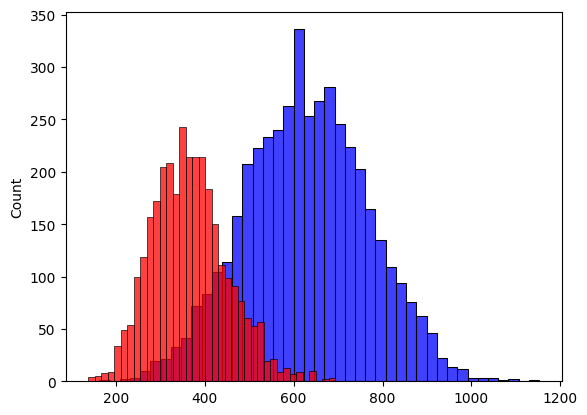

In [2]:
#hypothesis 1: men lift more than women, compare men and women groups
#use TotalKg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#dictionary which contains the data values and test results, key is the name of the test
results = dict()

#two sample datasets as lists

sample1 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()
sample2 = df['TotalKg'].loc[(df['Sex'] == 'F') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()

#plot the data
sns.histplot(sample1, color='blue')
sns.histplot(sample2, color='red')

t, p = stats.ttest_ind(sample1, sample2, equal_var=False)
print("t-statistics = " + str(t))
print("p-value = " + str(p))
print("difference of mean values = " + str(np.mean(sample1) - np.mean(sample2)) + ' kg')

#conclusion of t-test: p-value is less than 0.05, so we reject the null hypothesis
if p < 0.05:
    print("We reject the null hypothesis. There is significant difference between the means of the two groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the means of the two groups.")

#add the results to the dictionary
results.update({'Hypothesis 1': {'t-test':[t, p], 'samples data':[sample1, sample2]}})

t-statistics = 104.13839266625338
p-value = 0.0
difference of mean values = 73.0789647480977 kg
We reject the null hypothesis. There is significant difference between the means of the two groups.


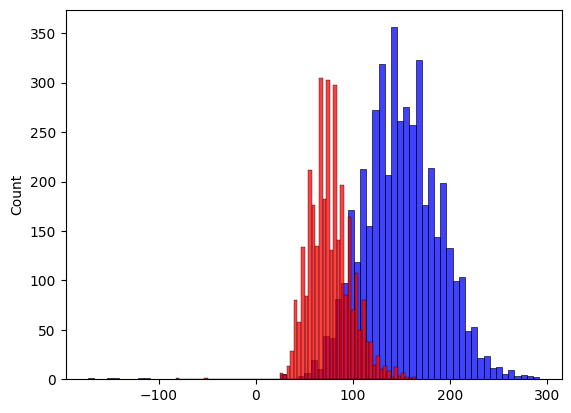

In [4]:
#Hypothesis 2: men lift more in bench press than women"
#two sample datasets as lists

sample21 = df['Best3BenchKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()
sample22 = df['Best3BenchKg'].loc[(df['Sex'] == 'F') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()

#plot the data
sns.histplot(sample21, color='blue')
sns.histplot(sample22, color='red')

t, p = stats.ttest_ind(sample21, sample22, equal_var=False)
print("t-statistics = " + str(t))
print("p-value = " + str(p))
print("difference of mean values = " + str(np.mean(sample21) - np.mean(sample22)) + ' kg')

#conclusion of t-test: p-value is less than 0.05, so we reject the null hypothesis
if p < 0.05:
    print("We reject the null hypothesis. There is significant difference between the means of the two groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the means of the two groups.")

#add the results to the dictionary
results.update({'Hypothesis 2': {'t-test':[t, p], 'samples data':[sample21, sample22]}})


t-statistics = 9.17497840599966
p-value = 3.2387344953295073e-14
difference of mean values = 100.38799679487181 kg
We reject the null hypothesis. There is significant difference between the means of the two groups.


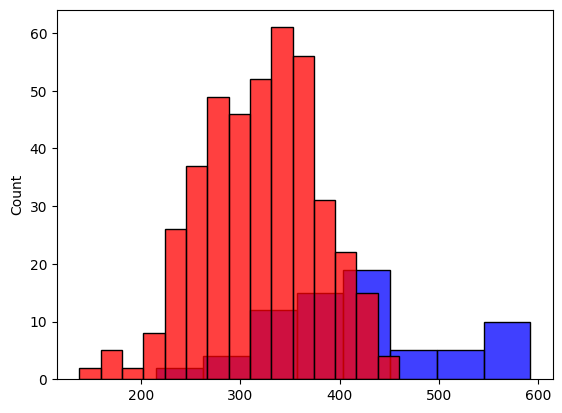

In [5]:
#Hypothesis 3: "men lift more than women when bodyweight is 50-55kg"
#two sample datasets as lists

sample31 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')&
                            (df['BodyweightKg'] < 55) & (df['BodyweightKg'] > 50)].dropna().to_list()
sample32 = df['TotalKg'].loc[(df['Sex'] == 'F') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')&
                            (df['BodyweightKg'] < 55) & (df['BodyweightKg'] > 50)].dropna().to_list()

#plot the data
sns.histplot(sample31, color='blue')
sns.histplot(sample32, color='red')

t, p = stats.ttest_ind(sample31, sample32, equal_var=False)
print("t-statistics = " + str(t))
print("p-value = " + str(p))
print("difference of mean values = " + str(np.mean(sample31) - np.mean(sample32)) + ' kg')

#conclusion of t-test: p-value is less than 0.05, so we reject the null hypothesis
if p < 0.05:
    print("We reject the null hypothesis. There is significant difference between the means of the two groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the means of the two groups.")

#add the results to the dictionary
results.update({'Hypothesis 3': {'t-test':[t, p], 'samples data':[sample31, sample32]}})

t-statistics = 25.415148619517065
p-value = 3.7163565909390945e-32
difference of mean values = 303.4591968315372 kg
We reject the null hypothesis. There is significant difference between the means of the two groups.


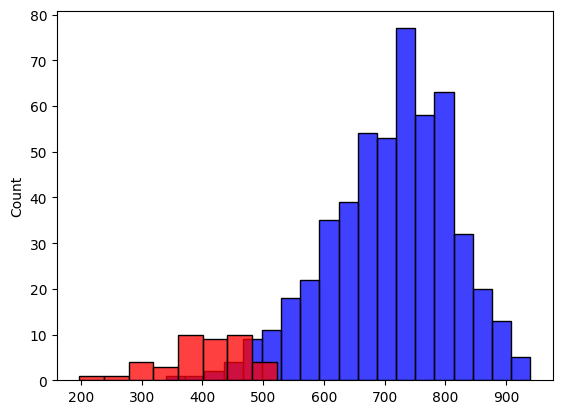

In [6]:
#Hypothesis 4: "men lift more than women when bodyweight is 100-105kg"
#two sample datasets as lists

sample41 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')&
                            (df['BodyweightKg'] < 105) & (df['BodyweightKg'] > 100)].dropna().to_list()
sample42 = df['TotalKg'].loc[(df['Sex'] == 'F') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')&
                            (df['BodyweightKg'] < 105) & (df['BodyweightKg'] > 100)].dropna().to_list()

#plot the data
sns.histplot(sample41, color='blue')
sns.histplot(sample42, color='red')

t, p = stats.ttest_ind(sample41, sample42, equal_var=False)
print("t-statistics = " + str(t))
print("p-value = " + str(p))
print("difference of mean values = " + str(np.mean(sample41) - np.mean(sample42)) + ' kg')

#conclusion of t-test: p-value is less than 0.05, so we reject the null hypothesis
if p < 0.05:
    print("We reject the null hypothesis. There is significant difference between the means of the two groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the means of the two groups.")

#add the results to the dictionary
results.update({'Hypothesis 4': {'t-test':[t, p], 'samples data':[sample41, sample42]}})

t-statistics = 26.165792769459316
p-value = 1.2956790623693783e-145
difference of mean values = 75.52427685782993 kg
We reject the null hypothesis. There is significant difference between the means of the two groups.


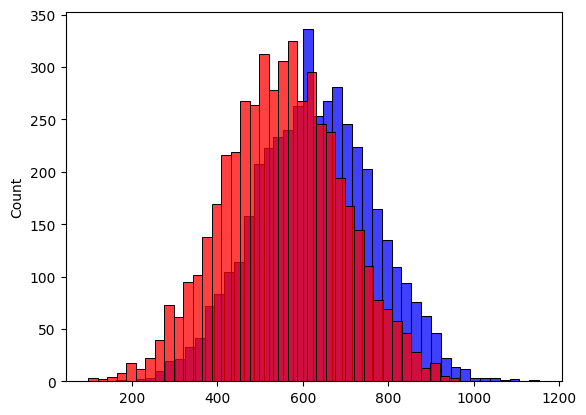

In [7]:
#Hypothesis 5: "men lift more in IPF than in WPC" compare "TotalKg" lifts"
sample51 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()
sample52 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'WPC')].dropna().to_list()

#plot the data
sns.histplot(sample51, color='blue')
sns.histplot(sample52, color='red')

t, p = stats.ttest_ind(sample51, sample52, equal_var=False)
print("t-statistics = " + str(t))
print("p-value = " + str(p))
print("difference of mean values = " + str(np.mean(sample51) - np.mean(sample52)) + ' kg')

#conclusion of t-test: p-value is less than 0.05, so we reject the null hypothesis
if p < 0.05:
    print("We reject the null hypothesis. There is significant difference between the means of the two groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the means of the two groups.")

#add the results to the dictionary
results.update({'Hypothesis 5': {'t-test':[t, p], 'samples data':[sample51, sample52]}})

Date
1995-11-15    567.5
1992-11-19    535.0
1991-11-14    497.5
1993-11-27    567.5
1994-11-17    577.5
              ...  
2022-08-31    465.0
2022-08-31    452.5
2022-08-31    432.5
2022-08-31    390.0
1999-11-17    592.5
Name: TotalKg, Length: 7548, dtype: float64

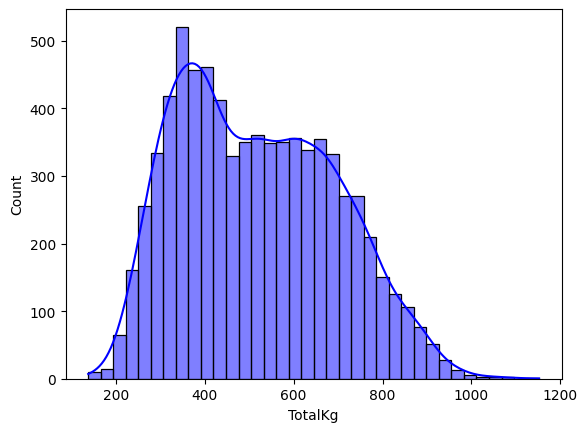

In [8]:
#Hypothesis 6: "Lifter country affect to TotalKg"
#check data is it normally distributed

import seaborn as sns
sample61 = df['TotalKg'].loc[(df['Event'] == 'SBD') & (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna()

sns.histplot(sample61, kde=True, color='blue')
sample61



In [11]:
from scipy.stats import shapiro
  

#downsampled1 = list1[::500]
  
stat, p = shapiro(sample61)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#test results, if p > alpha, then data is normally distributed
alpha = 0.05
if p > alpha:
    print('Sample1 looks Gaussian (fail to reject H0)')
else:
    print('Sample1 does not look Gaussian (reject H0)')

Statistics=0.974, p=0.000
Sample1 does not look Gaussian (reject H0)


Statistics=0.999, p=0.100
Sample1 looks Gaussian (fail to reject H0)


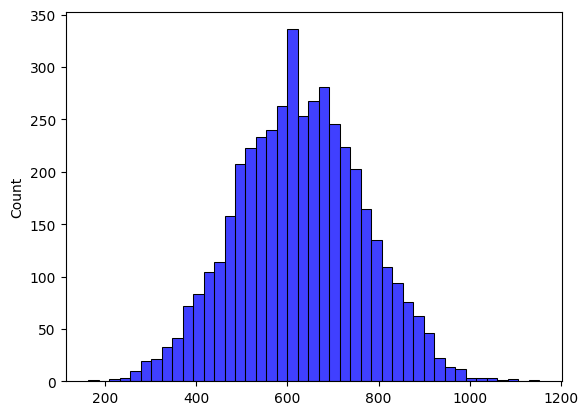

In [12]:
# Let's take away women data and check if  data normaly distributed
sample61 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()
sns.histplot(sample61, color='blue')

stat, p = shapiro(sample61)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#test results, if p > alpha, then data is normally distributed
alpha = 0.05
if p > alpha:
    print('Sample1 looks Gaussian (fail to reject H0)')
else:
    print('Sample1 does not look Gaussian (reject H0)')

In [23]:
# Now data is normally distributed. Let's create new dataframe with same filters.
df_full_power = df.loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')]
df_full_power.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,4553.000000,4553.000000,4535.000000,4512.000000,4416.000000,1.0,4496.000000,4522.000000,4504.000000,4420.000000,...,4509.000000,4457.000000,4323.000000,0.0,4481.000000,4385.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,32.875906,90.092879,169.017398,142.223712,46.745385,253.0,226.148508,126.950268,92.186079,3.985853,...,212.674347,151.764402,-49.944455,NaN,251.142955,628.101756,417.779083,416.777885,400.970833,84.380167
std,15.216415,24.393753,140.772560,182.088665,232.796070,NaN,59.354396,73.155824,122.896515,157.626290,...,116.214507,206.509067,260.258522,NaN,53.716948,138.800563,68.531141,68.643336,65.782083,14.036120
min,13.500000,42.250000,-442.500000,-440.000000,-478.000000,253.0,-230.000000,-270.000000,-292.500000,-292.500000,...,-355.000000,-400.000000,-410.500000,NaN,-270.000000,162.500000,164.540000,164.890000,158.350000,32.180000
25%,21.500000,73.000000,160.000000,150.000000,-210.000000,253.0,190.000000,110.000000,95.000000,-150.000000,...,200.000000,172.500000,-275.000000,NaN,217.500000,532.500000,375.115000,374.275000,359.785000,75.712500
50%,26.500000,84.650000,205.000000,210.000000,175.000000,253.0,225.000000,140.000000,137.500000,78.750000,...,235.000000,235.000000,-210.000000,NaN,252.500000,627.500000,422.790000,421.290000,405.670000,85.440000
75%,42.500000,103.920000,242.500000,250.000000,240.000000,253.0,263.020000,165.000000,167.500000,155.000000,...,270.000000,277.500000,240.000000,NaN,287.500000,722.500000,467.587500,466.427500,448.500000,94.680000
max,81.500000,201.000000,450.000000,470.000000,470.000000,253.0,470.000000,277.500000,282.000000,291.500000,...,370.000000,399.000000,410.000000,NaN,410.000000,1152.500000,592.590000,621.240000,583.810000,116.890000


In [22]:
# let's group data by coutry and output totalKg mean values
df_full_power_by_country = df_full_power.groupby('Country').mean(['TotalKg']).sort_values(by='TotalKg', ascending=False)
df_full_power_by_country.reset_index(inplace=True)
df_full_power_by_country['TotalKg']
df_country = pd.DataFrame(df_full_power.groupby('Country'))
df_country

,0,1
0,Algeria,Name Sex Event Equipme...
1,Argentina,Name Sex Event Equip...
2,Armenia,Name Sex Event Equipme...
3,Australia,Name Sex Event Equ...
4,Austria,Name Sex Event ...
...,...,...
94,USA,Name Sex Event Equip...
95,Ukraine,Name Sex Event E...
96,Uruguay,Name Sex Event Equi...
97,Uzbekistan,Name Sex Event Equip...


In [19]:
#let's say we want to plot histogram of every country totalKg values
#save data to list if data is more than 100 values, actually this list of lists [[], [], []]
dataList = []
dataMeanList = []
countryNames = []

for country in df_full_power_by_country['Country']:
    data = df_full_power.loc[df_full_power['Country'] == country]['TotalKg'].dropna().tolist()
    if len(data) > 100:
        dataList.append(data)
        dataMeanList.append(np.nanmean(data))
        countryNames.append(country)

print(dataList)
print(dataMeanList)
print(countryNames)

[[687.5, 655.0, 442.5, 770.0, 708.0, 717.5, 850.0, 605.0, 585.0, 652.5, 732.5, 772.5, 762.5, 862.5, 732.5, 702.5, 687.5, 707.5, 597.5, 637.5, 610.0, 602.5, 492.5, 680.0, 645.0, 482.5, 550.0, 475.0, 560.0, 527.5, 280.0, 620.0, 610.0, 722.5, 687.5, 740.0, 722.5, 747.5, 695.0, 497.5, 412.5, 600.0, 702.5, 660.0, 640.0, 612.5, 495.0, 470.0, 562.5, 545.0, 530.0, 732.5, 687.5, 782.5, 857.5, 882.5, 680.0, 592.5, 490.0, 782.5, 737.5, 505.0, 747.5, 807.5, 870.0, 687.5, 745.0, 532.5, 730.0, 722.5, 805.0, 890.0, 680.0, 907.5, 517.5, 722.5, 670.0, 655.0, 490.0, 585.0, 570.0, 558.0, 517.5, 400.0, 427.5, 665.0, 795.0, 732.5, 730.0, 825.0, 825.0, 757.0, 745.0, 699.0, 625.0, 735.0, 777.5, 807.5, 612.5, 435.0, 600.0, 820.0, 760.0, 780.0, 750.0, 812.5, 832.5, 625.0, 682.5, 747.5, 730.0, 745.0, 823.5, 847.5], [715.0, 778.0, 745.0, 725.0, 757.5, 620.0, 702.5, 740.0, 802.5, 705.0, 742.5, 680.0, 542.5, 535.0, 632.5, 715.0, 547.5, 740.0, 732.5, 710.0, 492.5, 400.0, 632.5, 602.5, 600.0, 520.0, 602.5, 632.5, 65

In [20]:
import scipy.stats as stats
f, p = stats.f_oneway(*dataList) # *dataList is same as dataList[0], dataList[1], dataList[2]...
print(f)
print(p)

#test if data mean values are different from each other
#H0: data mean values are same
#H1: data mean values are different
#p > alpha, then H0 is true
#p < alpha, then H1 is true
alpha = 0.05
if p > alpha:
    print('Data mean values are same (fail to reject H0)')
else:
    print('Data mean values are different (reject H0)')

results.update({'Hypothesis 6': {'f-test':[f, p], 'samples data':[dataList, countryNames]}})

18.280841350998607
1.701462663713284e-38
Data mean values are different (reject H0)


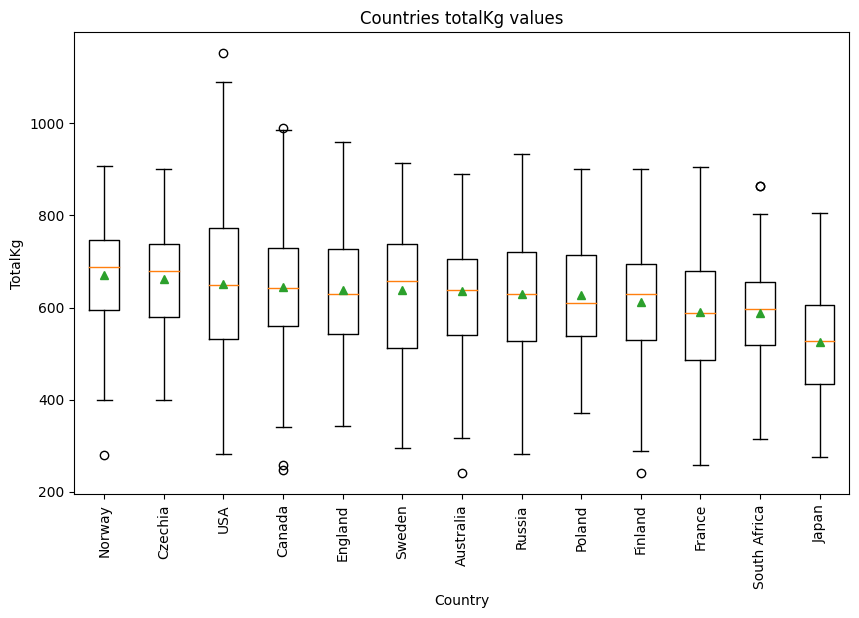

In [21]:
import matplotlib.pyplot as plt

#boxplot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title("Countries totalKg values")
ax.set_xlabel("Country")
ax.set_ylabel("TotalKg")

ax.boxplot(dataList, labels=countryNames, showmeans=True)
plt.xticks(rotation=90)

plt.show()

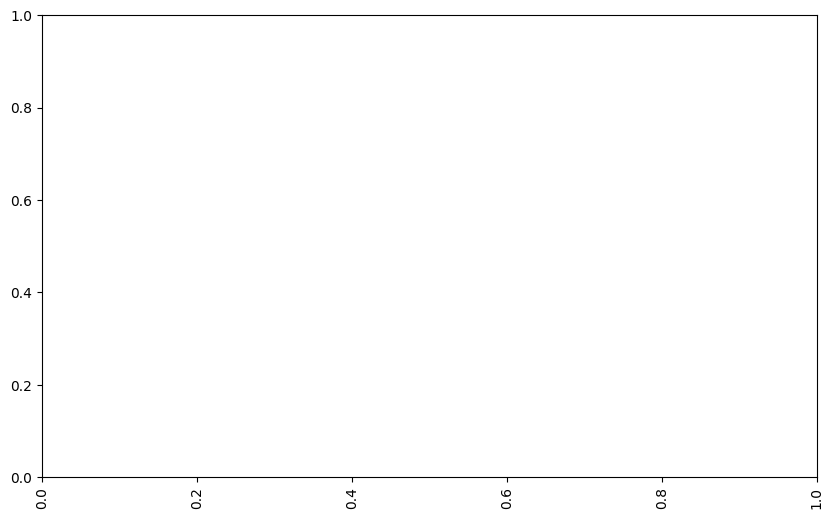

            0    1
0  102.140804  0.0
           0             1
0  18.280841  1.701463e-38
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File c:\Users\Mariia\AppData\Local\Programs\Python\Python310\lib\site-packages\dash\_callback.py:478, in register_callback.<locals>.wrap_func.<locals>.add_context(*args=('Hypothesis 6',), **kwargs={})
    477 try:
--> 478     jsonResponse = to_json(response)
        response = {'multi': True, 'response': defaultdict(<class 'dict'>, {'graph1': {'figure': <Figure size 1000x600 with 1 Axes>}})}
    479 except TypeError:

File c:\Users\Mariia\AppData\Local\Programs\Python\Python310\lib\site-packages\dash\_utils.py:25, in to_json(
    value={'multi': True, 'response': defaultdict(<class 'dict'>, {'graph1': {'figure': <Figure size 1000x600 with 1 Axes>}})}
)
     23 from plotly.io.json import to_json_plotly
---> 25 return to_json_plotly(value)
        

In [26]:
from dash import Dash, html, dcc, callback, Input, Output
import plotly.express as px
import matplotlib.pyplot as plt

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Powerlifting data analysis", style={'textAlign': 'center'}),
    dcc.Dropdown(list(results.keys()), 'Hypothesis 1', id='dropdown1'),
    dcc.Graph(id='graph1')
    ])

@app.callback(Output('graph1', 'figure'), Input('dropdown1', 'value'))

def update_graph(selected_dropdown_value):
    if selected_dropdown_value  =='Hypothesis 6':
        dict_res = results[selected_dropdown_value]
        df_data = pd.DataFrame(dict_res['samples data']).transpose() #rows to columns
        #add t-test results to the figure title
        df_t_test = pd.DataFrame(dict_res['f-test']).transpose() #rows to columns
        print(df_t_test)
        g = plt.figure(figsize=(10,6))
        ax = g.add_subplot(111)
        ax.set_title("Countries totalKg values")
        ax.set_xlabel("Country")
        ax.set_ylabel("TotalKg")

        ax.boxplot(dataList, labels=countryNames, showmeans=True)
        plt.xticks(rotation=90)
    else:
        dict_res = results[selected_dropdown_value]
        df_data = pd.DataFrame(dict_res['samples data']).transpose() #rows to columns
        #add t-test results to the figure title
        df_t_test = pd.DataFrame(dict_res['t-test']).transpose() #rows to columns
        print(df_t_test)
        g = px.histogram(df_data, x=df_data.columns, barmode='overlay', color_discrete_sequence=['blue', 'red'])
        g.update_layout(title_text="t-statistics = " + str(df_t_test[0][0]))# + ", p-value = " + str(df_t_test[0][1]))
    
    return g

app.run_server(debug=True, port=8053)
